In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDOneClassSVM

import pandas as pd
import numpy as np

import os
import pickle

from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt 
%matplotlib inline

import sys
sys.path.append('..')

from src.utils import train_test_anomaly, raw_thresholds

In [2]:
file_direc = '../datasets/Dodgers/101-freeway-traffic.test.out'

In [3]:
data = pd.read_csv(file_direc)

In [4]:
new_column_names = {'-1': 'value', '1': 'anomaly'}

data.rename(columns=new_column_names, inplace=True)

In [5]:
train_data, test_data = train_test_anomaly(data)

In [6]:
train_np = train_data['value'].to_numpy()
train_np = train_np.reshape(-1, 1)

In [7]:
model = SGDOneClassSVM()
model.fit(train_np)

SGDOneClassSVM()

### Evaluation of the Model

In [8]:
test_np = test_data['value'].to_numpy()
test_np = test_np.reshape(-1, 1)

In [17]:
anomaly_scores = model.decision_function(test_np)
anomaly_scores

array([ 10.25562349,  10.25562349,  48.83915029, ...,  56.55585565,
         7.68338837, -18.03896284])

In [18]:
threshold = raw_thresholds(anomaly_scores)
threshold

79.70597173461806

In [36]:
threshold_list = []

for x in anomaly_scores:

    if x > threshold + 5:
        threshold_list.append(1)
    
    else:
        threshold_list.append(0)

thres_np = np.array(threshold_list)
thres_np.reshape(-1, 1)

thres_np.shape

(15188,)

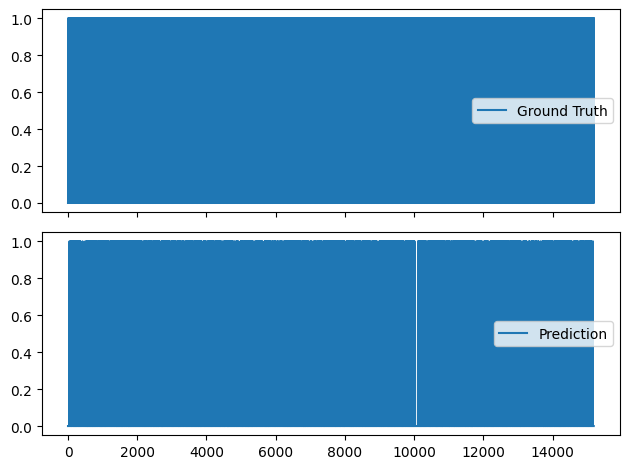

In [37]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.plot(test_data.index, test_data['anomaly'], label = 'Ground Truth')
ax1.legend()

ax2.plot(test_data.index, thres_np, label = 'Prediction')
ax2.legend()

plt.tight_layout()

plt.show()

In [38]:
gtruth_np = test_data['anomaly'].to_numpy()

gtruth_np = gtruth_np.reshape(-1, 1)

In [39]:
prec = precision_score(gtruth_np, thres_np, pos_label=1)
recall = recall_score(gtruth_np, thres_np, pos_label=1)
f1 = f1_score(gtruth_np, thres_np, pos_label=1)

In [40]:
print(f'Precsion Score: {prec:.4f}  Recall: {recall:.4f}  f1_score: {f1:.4f}')

Precsion Score: 0.1998  Recall: 0.0406  f1_score: 0.0675


In [41]:
file_name = f'../saved_models/osvm_dodgers_v2.sav'

pickle.dump(model, open(file_name, 'wb'))